# Overview of Assignment 3

This assignment focuses on exploring and implementing advanced concepts and techniques in information retrieval and recommender systems. The primary objectives are to develop a semantic search engine using Artificial Neural Networks (ANNs), explore alternative models for text search, and design a recommender system based on lecture transcripts.

#   Enter your details below

# Name

Mansi Patel

# Banner ID

B00871094

# Q1: Setting up the libraries and environment

In [ ]:
!pip install annoy torch numpy matplotlib pillow datasets transformers faiss-cpu torchvision torchaudio


# Q2: Semantic Search using ANN for Text-to-Text with Annoy

(a) 
Vector embeddings are numerical representations of text that encode semantic meaning. Text documents are converted into high-dimensional vectors via an Artificial Neural Network (ANN), such as a Transformer model (e.g., BERT, RoBERTa). Using huge corpora, the ANN learns to map comparable sentences to related vector spaces. These embeddings record the semantic linkages between words and phrases, allowing for more meaningful comparisons and searches than standard keyword-based approaches.

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=74d9d7aba95d70945916fd2e30a03a86c4c1d9ad0cbb430c8efb8d62c7c8e853
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [41]:
import pandas as pd
df = pd.read_csv('food_recipes.csv')
df_subset = df.head(30)
texts = df_subset['directions'].tolist()

In [58]:
from annoy import AnnoyIndex
import random

ModuleNotFoundError: No module named 'annoy'

In [59]:
from transformers import BertTokenizer, BertModel
import torch

def generate_embeddings(texts, model_name='bert-base-uncased'):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        # Use the mean of the last hidden state as the embedding
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze()
        embeddings.append(embedding)
    return embeddings

embeddings = generate_embeddings(texts)


(c)
The Annoy library (Approximate Nearest Neighbors Oh Yeah) is designed to handle large-scale vector data efficiently. It builds a forest of trees for fast nearest neighbor search. Each tree is built by randomly selecting vectors and partitioning the space using hyperplanes. The result is an efficient data structure for approximate nearest neighbor searches.

In [6]:
from annoy import AnnoyIndex

def build_annoy_index(embeddings, num_trees=10, vector_dim=768):
    index = AnnoyIndex(vector_dim, 'angular')
    for i, embedding in enumerate(embeddings):
        index.add_item(i, embedding.numpy())
    index.build(num_trees)
    return index

# Example usage
annoy_index = build_annoy_index(embeddings)


(e)To perform a semantic search, the process involves generating an embedding for the query text, then using the Annoy index to find the nearest neighbors in the stored embeddings. This is efficient due to the structure of the Annoy index.

In [7]:
def semantic_search(query_text, annoy_index, texts, model_name='bert-base-uncased', num_results=5):
    # Generate embedding for the query text
    query_embedding = generate_embeddings([query_text], model_name=model_name)[0]
    # Find nearest neighbors
    nearest_neighbors = annoy_index.get_nns_by_vector(query_embedding.numpy(), num_results)
    # Retrieve corresponding texts
    results = [texts[i] for i in nearest_neighbors]
    return results

query = "bakeing cookies"
results = semantic_search(query, annoy_index, texts)
print(results)


['Mix ingredients together for 5 minutes., Scrape bowl often. Last fold in chocolate chip mints., Bake at 350° for 35 to 40 minutes or until done (cake mix directions).', 'Empty Cool Whip into a bowl., Drain juice from pineapple., Mix Cool Whip and pineapple., Add condensed milk., Squeeze lemons, remove seeds and add to Cool Whip and pineapple., Chop nuts into small pieces and add to mixture., Stir all ingredients together and mix well., Pour into a graham cracker crust., Use top from crust to cover top of pie., Chill overnight., Makes 2 pies.', 'Place chipped beef on bottom of baking dish., Place chicken on top of beef., Mix soup and cream together; pour over chicken. Bake, uncovered, at 275° for 3 hours.', 'Cream sugar and shortening., Add eggs, salt and soda, then bananas and flour., Add nuts., Mix well., Bake in loaf pan at 350° for 1 hour.', 'Mix Jell-O in boiling water., Add strawberries, pineapple, crushed bananas and nuts., Spread 1/2 mixture in 13 x 6 1/2-inch pan., Allow to g

(g)
Advantages:

Efficiency: Annoy is designed for speed and can handle huge datasets efficiently.
Scalability: It adapts nicely to the amount of vectors and dimensions.
Semantic Understanding: Using ANN-based embeddings captures semantic relationships better than keyword matching.

Limitations:

Approximation: Annoy calculates approximate nearest neighbors, which may not always be exact matches.
Resource Intensive: Generating embeddings using large ANN models can be computationally expensive.
Storage: Storing high-dimensional embeddings and the Annoy index can require significant memory.

# Q3 Searching Images with Text

(A)
The Vision Transformer (ViT) model adapts the Transformer architecture, which is originally designed for natural language processing, to handle image data. ViT divides an image into fixed-size patches, linearly embeds these patches, and processes them as a sequence of tokens, similar to words in a sentence. The model utilizes self-attention mechanisms to capture relationships between patches and global context within the image.

ALIGN (A Large-scale ImaGe and Noisy-text embedding): Developed by Google, ALIGN uses a large-scale image and text dataset to create a unified embedding space, enabling effective cross-modal retrieval where text can be used to search for related images.

In [38]:
%pip install torch numpy matplotlib pillow datasets transformers faiss-cpu torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


In [39]:
import os
import pandas as pd
# define the image paths and captions
image_path = os.listdir('archive/Images/')
image_path = ['archive/Images/' + path for path in image_path if '.jpg' in path]
image_path.sort()
captions_df = pd.read_csv('archive/captions.txt')

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


c:\Users\mansi\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Caption: The small child climbs on a red ropes on a playground .


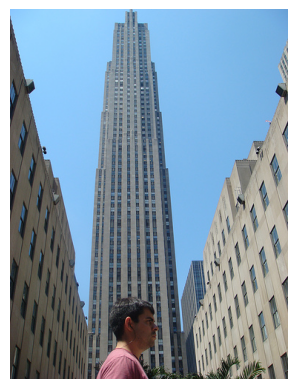

Caption: A man with glasses is wearing a beer can crocheted hat .


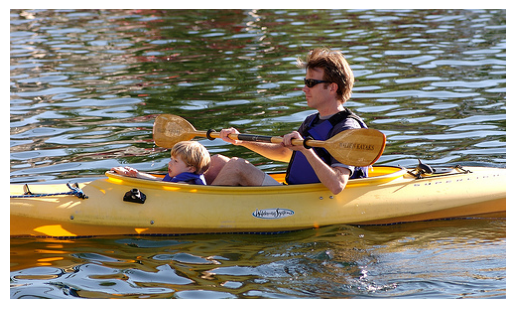

Caption: A man wears an orange hat and glasses .


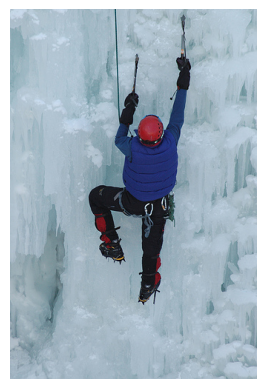

Caption: A little girl in a pink dress going into a wooden cabin .


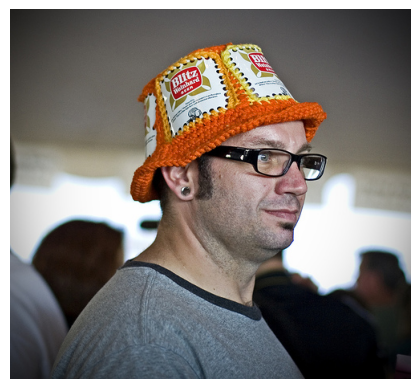

Caption: A man lays on a bench while his dog sits by him .


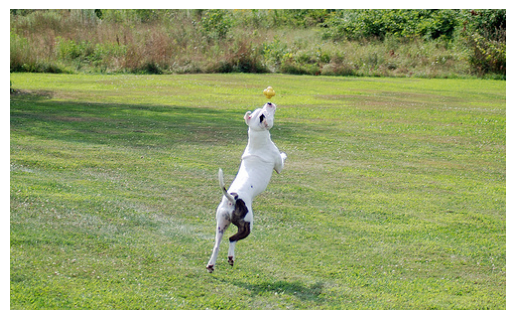

In [51]:
import os
import torch
from PIL import Image
from torchvision import transforms
from transformers import ViTFeatureExtractor, ViTModel, BertTokenizer, BertModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import faiss
import matplotlib.pyplot as plt

captions_df = pd.read_csv('archive/captions.txt', delimiter=',')
print(captions_df.head())

if captions_df.shape[1] == 2:
    captions_df.columns = ['image', 'caption']
    captions_df = captions_df.head(30)
else:
    raise ValueError("The file does not have the expected two columns.")

image_paths = [f'archive/Images/{path}' for path in os.listdir('archive/Images/') if path.endswith('.jpg')]
image_paths.sort()
image_paths = image_paths[:30]

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
])

def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image_transform(image)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_caption(caption):
    return tokenizer(caption, return_tensors='pt', truncation=True, padding='max_length', max_length=16)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224').to(device)
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

def embed_image(image_path):
    image = preprocess_image(image_path).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = vit_model(image)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

def embed_caption(caption):
    inputs = preprocess_caption(caption).to(device)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

image_embeddings = np.array([embed_image(path) for path in image_paths]).squeeze()
caption_embeddings = np.array([embed_caption(caption) for caption in captions_df['caption']]).squeeze()


image_embeddings = normalize(image_embeddings)
caption_embeddings = normalize(caption_embeddings)


index = faiss.IndexFlatIP(image_embeddings.shape[1])
index.add(image_embeddings)

def search(query, top_k=5):
    query_embedding = embed_caption(query)
    query_embedding = normalize(query_embedding).astype('float32')
    D, I = index.search(query_embedding, top_k)
    return I


query = "man running"
result_indices = search(query)

for idx in result_indices[0]:
    image_path = image_paths[idx]
    caption = captions_df.iloc[idx]['caption']
    print(f"Caption: {caption}")
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


# Q4 Recommender System

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from heapq import nlargest
from sklearn.metrics import mean_squared_error
from math import sqrt
import os.path

In [42]:
MOVIELENS_DIR = "ml-100k/"

In [43]:
fields = ['userID', 'itemID', 'rating', 'timestamp']
ratingDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u.data'), sep='\t', names=fields)

ratingDF.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [44]:
numUsers = len(ratingDF.userID.unique())
numItems = len(ratingDF.itemID.unique())

print("Number of users:", numUsers)
print("Number of items:", numItems)

Number of users: 943
Number of items: 1682


In [45]:
fieldsMovies = ['movieID', 'movieTitle', 'releaseDate', 'videoReleaseDate', 'IMDbURL', 'unknown', 'action', 'adventure',
          'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmNoir', 'horror',
          'musical', 'mystery', 'romance','sciFi', 'thriller', 'war', 'western']
moviesDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u.item'), sep='|', names=fieldsMovies, encoding='latin-1')

moviesDF.head()

,movieID,movieTitle,releaseDate,videoReleaseDate,IMDbURL,unknown,action,adventure,animation,childrens,...,fantasy,filmNoir,horror,musical,mystery,romance,sciFi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
trainDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u1.base'), sep='\t', names=fields)
testDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u1.test'), sep='\t', names=fields)

print("# of lines in train:", trainDF.shape[0])
print("# of lines in test:", testDF.shape[0])

# of lines in train: 80000
# of lines in test: 20000


(a) Normalize and clean movie titles, handle missing values, and combine titles with genres.
Build a user-item matrix from the training and testing data, where each entry represents a user's rating for an item.
Calculate the cosine similarity between item vectors in the user-item matrix to create an item-item similarity matrix.
Use the similarity matrix to predict user ratings for items based on similar items.
Generate top-N item recommendations for a user by selecting the highest predicted ratings for items the user has not already rated.

In [47]:
def buildUserItemMatrix(dataset, numUsers, numItems):
    
    matrix = np.zeros((numUsers, numItems), dtype=np.int8)

    for (index, userID, itemID, rating, timestamp) in dataset.itertuples():
        matrix[userID-1, itemID-1] = rating
    return matrix

In [48]:
trainUserItemMatrix = buildUserItemMatrix(trainDF, numUsers, numItems)
testUserItemMatrix = buildUserItemMatrix(testDF, numUsers, numItems)

trainUserItemMatrix

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int8)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate item-item cosine similarities
item_similarity = cosine_similarity(trainUserItemMatrix.T)

def predict_ratings(user_item_matrix, similarity_matrix):
    return user_item_matrix.dot(similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])

# Predict ratings for the train data
predicted_ratings = predict_ratings(trainUserItemMatrix, item_similarity)

def recommend_items(user_id, user_item_matrix, predicted_ratings, top_n=5):
    user_index = user_id - 1
    already_rated = user_item_matrix[user_index] > 0
    recommendations = np.argsort(predicted_ratings[user_index])[-top_n:][::-1]
    return [(movieID+1, predicted_ratings[user_index, movieID]) for movieID in recommendations if not already_rated[movieID]]

user_id = 7
recommendations = recommend_items(user_id, trainUserItemMatrix, predicted_ratings, top_n=5)
print(f"Top 5 recommendations for user {user_id}: {recommendations}")

Top 5 recommendations for user 7: [(1520, nan), (830, nan), (599, nan), (1492, nan), (857, nan)]


C:\Users\mansi\AppData\Local\Temp\ipykernel_13268\2181316733.py:6: RuntimeWarning: invalid value encountered in divide
  return user_item_matrix.dot(similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])


(b)

In [25]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_and_vectorize_items(itemDF):
   
    itemDF.dropna(subset=['movieTitle'] + list(itemDF.columns[6:]), inplace=True)

    itemDF['movieTitle'] = itemDF['movieTitle'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

    itemDF['combined'] = itemDF['movieTitle'] + ' ' + itemDF.iloc[:, 6:].apply(lambda x: ' '.join(x.index[x == 1]), axis=1)

    itemDF = itemDF[itemDF['combined'].str.strip() != '']

    vectorizer = TfidfVectorizer(stop_words='english')
    item_tfidf_matrix = vectorizer.fit_transform(itemDF['combined'])

    return item_tfidf_matrix, itemDF

item_tfidf_matrix, moviesDF = preprocess_and_vectorize_items(moviesDF)
print(item_tfidf_matrix.shape)


(1682, 2321)


In [27]:

item_similarity_matrix = cosine_similarity(item_tfidf_matrix, item_tfidf_matrix)

item_similarity_df = pd.DataFrame(item_similarity_matrix, index=moviesDF['movieID'], columns=moviesDF['movieID'])

item_similarity_df.head()


movieID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movieID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.063059,0.074220,0.111394,0.064233,0.021257,0.067098,0.223437,0.057152,0.055717,...,0.067515,0.000000,0.000000,0.000000,0.079638,0.000000,0.000000,0.000000,0.048929,0.000000
2,0.063059,1.000000,0.193853,0.176516,0.167769,0.026143,0.082520,0.080893,0.070287,0.068523,...,0.269649,0.000000,0.000000,0.000000,0.097941,0.000000,0.090042,0.000000,0.000000,0.000000
3,0.074220,0.193853,1.000000,0.097825,0.197464,0.030770,0.097125,0.095211,0.082728,0.080651,...,0.207552,0.000000,0.000000,0.000000,0.115276,0.000000,0.105979,0.000000,0.000000,0.000000
4,0.111394,0.176516,0.097825,1.000000,0.123025,0.040714,0.128513,0.182184,0.109463,0.106714,...,0.188989,0.028609,0.043994,0.045781,0.152530,0.032208,0.000000,0.031840,0.064491,0.020892
5,0.064233,0.167769,0.197464,0.123025,1.000000,0.038697,0.122145,0.119738,0.104039,0.101426,...,0.179625,0.027192,0.041814,0.043513,0.144972,0.030612,0.091719,0.030262,0.000000,0.019857


In [28]:
def get_similar_items(item_id, num_recommendations=5):
    if item_id not in item_similarity_df.columns:
        return []
    
    similar_items = item_similarity_df[item_id].sort_values(ascending=False)
    
    similar_items = similar_items.drop(item_id)
    
    top_similar_items = similar_items.head(num_recommendations).index.tolist()
    return top_similar_items

similar_items = get_similar_items(1, num_recommendations=5)
print("Top 5 items similar to item 1:", similar_items)


Top 5 items similar to item 1: [1072, 1066, 1219, 548, 542]


(c)

In [29]:
# Function to compute the similarity matrix
def compute_similarity_matrix(item_tfidf_matrix):
   
    item_similarity_matrix = cosine_similarity(item_tfidf_matrix, item_tfidf_matrix)

    return item_similarity_matrix

item_tfidf_matrix, moviesDF = preprocess_and_vectorize_items(moviesDF)

item_similarity_matrix = compute_similarity_matrix(item_tfidf_matrix)

item_similarity_df = pd.DataFrame(item_similarity_matrix, index=moviesDF['movieID'], columns=moviesDF['movieID'])

print(item_similarity_df.head())


movieID      1         2         3         4         5         6         7     \
movieID                                                                         
1        1.000000  0.063059  0.074220  0.111394  0.064233  0.021257  0.067098   
2        0.063059  1.000000  0.193853  0.176516  0.167769  0.026143  0.082520   
3        0.074220  0.193853  1.000000  0.097825  0.197464  0.030770  0.097125   
4        0.111394  0.176516  0.097825  1.000000  0.123025  0.040714  0.128513   
5        0.064233  0.167769  0.197464  0.123025  1.000000  0.038697  0.122145   

movieID      8         9         10    ...      1673      1674      1675  \
movieID                                ...                                 
1        0.223437  0.057152  0.055717  ...  0.067515  0.000000  0.000000   
2        0.080893  0.070287  0.068523  ...  0.269649  0.000000  0.000000   
3        0.095211  0.082728  0.080651  ...  0.207552  0.000000  0.000000   
4        0.182184  0.109463  0.106714  ...  0.188989

(d)

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def predict_ratings(user_item_matrix, similarity_matrix):
    # Compute the predicted ratings by multiplying user-item matrix with item-item similarity matrix
    return user_item_matrix.dot(similarity_matrix) / np.array([np.abs(similarity_matrix).sum(axis=1)])

def compute_rmse(predictions, targets):
    # Compute Mean Squared Error
    mse = mean_squared_error(targets, predictions)
    # Compute Root Mean Squared Error
    rmse = sqrt(mse)
    return rmse

# Predict ratings for the test data
test_predicted_ratings = predict_ratings(testUserItemMatrix, item_similarity_matrix)

# Flatten the matrices for easy comparison
test_actual_ratings = testUserItemMatrix[testUserItemMatrix > 0]
test_predicted_ratings = test_predicted_ratings[testUserItemMatrix > 0]

# Compute RMSE
test_rmse = compute_rmse(test_predicted_ratings, test_actual_ratings)
print(f'RMSE on test data: {test_rmse}')


RMSE on test data: 3.411100046172315


Strengths:

Simplicity: Easy to implement using item-item similarity.
Interpretability: Recommendations are based on similarity, which is easy to understand.
Scalability: Efficient with sparse datasets like the MovieLens dataset.
Weaknesses:

Cold Start Problem: Poor performance for new items with few or no ratings.
Data Sparsity: High RMSE indicates challenges in predicting accurate ratings due to sparse data.
Bias Toward Popular Items: Tends to recommend popular items over niche items.
Potential Improvements:

Hybrid Models: Combine with user-based filtering or content-based methods to enhance performance.
Matrix Factorization: Use techniques like SVD or ALS to handle sparsity and improve accuracy.
Incorporate Additional Data: Use more features (e.g., user demographics, item metadata) for better recommendations.

# Q5 Collaborative Filtering

Collaborative filtering is a technique in recommender systems that identifies patterns by combining numerous users' preferences and actions to generate recommendations. It is based on the assumption that people who have previously preferred similar things will do so again in the future.

Differences with content-based filtering:

Data Usage: Collaborative filtering employs user interaction data (e.g., ratings, purchase history) to identify commonalities between users, whereas content-based filtering uses item properties.
Dependency: Collaborative filtering does not require specific item metadata, but instead relies on human activity, whereas content-based filtering requires exact item descriptions or features.
Scalability: Collaborative filtering can experience cold start issues with new items or users, but content-based filtering can better handle this by examining item properties.

In [31]:
trainDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u1.base'), sep='\t', names=fields)
testDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u1.test'), sep='\t', names=fields)
def dataPreprocessor(rating_df, num_users, num_items):
    """
        INPUT:
            data: pandas DataFrame. columns=['userID', 'itemID', 'rating' ...]
            num_row: int. number of users
            num_col: int. number of items

        OUTPUT:
            matrix: 2D numpy array.

        NOTE 1: see where something very similar is done in the lab in function 'buildUserItemMatrix'

        NOTE 2: data can have more columns, but your function should ignore
              additional columns.
    """
    ########### your code goes here ###########

    matrix = np.zeros((num_users, num_items), dtype=np.int8)

    # Populate the matrix based on the rating_df
    for (index, userID, itemID, rating, *_) in rating_df.itertuples():
        matrix[userID - 1, itemID - 1] = rating

    ###########         end         ###########
    return matrix

trainUserItemMatrix = dataPreprocessor(trainDF, numUsers, numItems)
testUserItemMatrix = dataPreprocessor(testDF, numUsers, numItems)

trainUserItemMatrix

array([[5, 3, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]], dtype=int8)

Reading Data: Reads movie rating data from two files (u1.base for training and u1.test for testing).

Defining Function: Creates a function dataPreprocessor to convert DataFrame to a user-item matrix.

Initializing Matrix: Initializes a numpy matrix of zeros to store user-item ratings.

Populating Matrix: Iterates through rating data, adjusting indices, and populating the matrix with ratings.

Returning Matrix: Returns the populated user-item matrix.

Applying Function: Calls dataPreprocessor for both training and testing datasets to prepare user-item matrices for collaborative filtering.








In [32]:
class BaseLineRecSys(object):
    def __init__(self, method, processor=dataPreprocessor):
        """
            method: string. From ['popularity','useraverage']
            processor: function name. dataPreprocessor by default
        """
        self.method_name = method
        self.method = self._getMethod(self.method_name)
        self.processor = processor
        self.pred_column_name = self.method_name

    def _getMethod(self, method_name):
        """
            Don't change this
        """
        switcher = {
            'popularity': self.popularity,
            'useraverage': self.useraverage,
        }

        return switcher[method_name]

    @staticmethod
    def useraverage(train_matrix, num_users, num_items):
        """
            INPUT:
                train_matrix: 2D numpy array.
                num_users: int. Number of Users.
                num_items: int. Number of Items.
            OUTPUT:
                predictionMatrix: 2D numpy array.

            NOTE: see where something very similar is done in the lab in function 'predictByUserAverage'
        """

        predictionMatrix = np.zeros((num_users, num_items))
        ########### your code goes here ###########
        # Initialize the predicted rating matrix with zeros
        for (user,item), rating in np.ndenumerate(train_matrix):
        # Predict rating for every item that wasn't ranked by the user (rating == 0)
            if rating == 0:
                userVector = train_matrix[user, :]
                ratedItems = userVector[userVector.nonzero()]

                if ratedItems.size == 0:
                    itemAvg = 0
                else:
                    itemAvg = ratedItems.mean()
                predictionMatrix[user, item] = itemAvg

            # report progress every 100 users
            if (user % 100 == 0 and item == 1):
                print ("calculated %d users" % (user,))

        ###########         end         ###########
        return predictionMatrix

    @staticmethod
    def popularity(train_matrix, num_users, num_items):
        """
            INPUT:
                train_matrix: 2D numpy array.
                num_users: int. Number of Users.
                num_items: int. Number of Items.
            OUTPUT:
                predictionMatrix: 2D numpy array.

            NOTE: see where something very similar is done in the lab in function 'predictByPopularity'
        """

        predictionMatrix = np.zeros((num_users, num_items))
        ########### your code goes here ###########
        # Initialize the predicted rating matrix with zeros
        # Calculate the popularity of each item
        item_popularity = np.sum(train_matrix != 0, axis=0) / num_users

        # Set the popularity score for each item across all users
        for j in range(num_items):
            predictionMatrix[:, j] = item_popularity[j]



        ###########         end         ###########
        return predictionMatrix

    def predict_all(self, train_df, num_users, num_items):

        train_matrix = self.processor(train_df, num_users, num_items)
        self.__model = self.method(train_matrix, num_users, num_items)

    def evaluate_test(self, test_df, copy=False):

        if copy:
            prediction = test_df.copy()
        else:
            prediction = test_df

        prediction[self.pred_column_name] = np.nan

        for (index,
             userID,
             itemID) in tqdm(prediction[['userID','itemID']].itertuples()):
            prediction.loc[index, self.pred_column_name] = self.__model[userID-1, itemID-1]

        return prediction

    def getModel(self):
        """
            return predicted user-item matrix
        """
        return self.__model

    def getPredColName(self):
        """
            return prediction column name
        """
        return self.pred_column_name

    def reset(self):
        """
            reuse the instance of the class by removing model
        """
        try:
            self.model = None
        except:
            print("You don not have model..")


popularity Method:

Purpose: Recommends items based on their overall popularity across all users.
Implementation: Calculates the popularity of each item by counting user ratings and sets predictions based on item popularity.
useraverage Method:

Purpose: Predicts ratings for items based on the average rating given by each user.
Implementation: Computes the average rating each user gives to items and predicts ratings for unrated items based on these averages.

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def compute_rmse(predictions, targets):
    mse = mean_squared_error(targets, predictions)
    rmse = sqrt(mse)
    return rmse

def compute_mae(predictions, targets):
    mae = mean_absolute_error(targets, predictions)
    return mae


In [34]:
# Instantiate the recommender system for user-based filtering
user_avg_recommender = BaseLineRecSys(method='useraverage')
user_avg_recommender.predict_all(trainDF, numUsers, numItems)
user_avg_predictions = user_avg_recommender.getModel()

item_based_predictions = predict_ratings(trainUserItemMatrix, item_similarity_matrix)

test_actual_ratings = testUserItemMatrix[testUserItemMatrix > 0]
user_avg_flat_predictions = user_avg_predictions[testUserItemMatrix > 0]
item_based_flat_predictions = item_based_predictions[testUserItemMatrix > 0]

user_avg_rmse = compute_rmse(user_avg_flat_predictions, test_actual_ratings)
user_avg_mae = compute_mae(user_avg_flat_predictions, test_actual_ratings)

item_based_rmse = compute_rmse(item_based_flat_predictions, test_actual_ratings)
item_based_mae = compute_mae(item_based_flat_predictions, test_actual_ratings)

print(f'User - RMSE: {user_avg_rmse}, MAE: {user_avg_mae}')
print(f'Item - RMSE: {item_based_rmse}, MAE: {item_based_mae}')


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users
User-based CF - RMSE: 1.0629951276561334, MAE: 0.8501912740150434
Item-based CF - RMSE: 3.4330072412653196, MAE: 3.2245210713487795


The lower RMSE and MAE indicate that user-based collaborative filtering provides more accurate recommendations compared to item-based filtering in this specific dataset. This method tends to offer more personalized recommendations since it focuses on finding users with similar preferences. User-based filtering can perform well even when the dataset is sparse, as long as there are enough users with similar preferences.

References
https://huggingface.co/docs/transformers/en/model_doc/vit
https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526
https://huggingface.co/docs/transformers/en/main_classes/tokenizer
https://huggingface.co/docs/transformers/en/model_doc/bert
https://sds-aau.github.io/M3Port19/portfolio/ann/
https://enterprise-knowledge.com/expert-analysis-keyword-search-vs-semantic-search-part-one/
https://www.elastic.co/blog/understanding-ann
https://research.google/blog/align-scaling-up-visual-and-vision-language-representation-learning-with-noisy-text-supervision/
https://www.analyticsvidhya.com/blog/2021/05/item-based-collaborative-filtering-build-your-own-recommender-system/
https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383